In [2]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'yfinance', 'pandas', 'matplotlib', 'stockstats','stable-baselines','gym','tensorflow'}
missing = required - installedPackages
if missing:
    !pip install yfinance
    !pip install pandas
    !pip install matplotlib
    !pip install stockstats
    !pip install gym
    !pip install stable-baselines[mpi]
    !pip install tensorflow==1.15.4

     |████████████████████████████████| 6.3 MB 39.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=e17e365fcb6329f34c750c10155aa2fa6f85708cddaac3a5c808b3e0004e8048
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 240 kB 31.2 MB/s 
     |████████████████████████████████| 1.4 MB 44.6 MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp37-cp37m-linux_x86_64.whl size=2065376 sha256=6f46eb07fcea4dccb500487ad84228c84dfd319aa7dfecbf04a3fa5e4912362b
  Stored in directory: /root/.cache/pip/wheels/da/37/ee/8d5c9166a378bb0b661bf4257b8e1ef8d79d879b931534fb98
Successfully built mpi4py
     |████████████████████████████████| 110.5 MB 28 kB/s 
     |████████████████████████████

In [3]:
import yfinance as yf
from stockstats import StockDataFrame as Sdf

import pandas as pd
import matplotlib.pyplot as plt

import gym
from stable_baselines import PPO2, DDPG, A2C, ACKTR, TD3
from stable_baselines import DDPG
from stable_baselines import A2C
from stable_baselines import SAC
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.common.policies import MlpPolicy

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [4]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Download and save the data in a pandas DataFrame:
data_df = yf.download("HDFCBANK.NS", start="2006-01-01", end="2021-06-23")

[*********************100%***********************]  1 of 1 completed


In [6]:
data_df.shape

(3806, 6)

In [7]:
# reset the index, we want to use numbers instead of dates
data_df=data_df.reset_index()

In [8]:
data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-01-02,70.875000,71.995003,70.699997,71.345001,64.269188,2685520
1,2006-01-03,68.000000,71.800003,68.000000,71.330002,64.255661,1282790
2,2006-01-04,72.000000,73.504997,71.400002,73.205002,65.944717,5369920
3,2006-01-05,73.199997,74.300003,72.525002,73.949997,66.615845,3853500
4,2006-01-06,74.000000,77.500000,73.000000,76.894997,69.268753,8616860


In [9]:
data_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
# convert the column names to standardized names
data_df.columns = ['datadate','open','high','low','close','adjcp','volume']

In [11]:
# check missing data 
data_df.isnull().values.any()

False

In [12]:
# calculate technical indicators like MACD
stock = Sdf.retype(data_df.copy())
# we need to use adjusted close price instead of close price
stock['close'] = stock['adjcp']
data_df['macd'] = stock['macd']

In [13]:
# check missing data again
data_df.isnull().values.any()

False

In [14]:
data_df.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2006-01-02,70.875000,71.995003,70.699997,71.345001,64.269188,2685520,0.000000
1,2006-01-03,68.000000,71.800003,68.000000,71.330002,64.255661,1282790,-0.000303
2,2006-01-04,72.000000,73.504997,71.400002,73.205002,65.944717,5369920,0.051991
3,2006-01-05,73.199997,74.300003,72.525002,73.949997,66.615845,3853500,0.098732
4,2006-01-06,74.000000,77.500000,73.000000,76.894997,69.268753,8616860,0.227617


In [15]:
data_clean = data_df.copy()

In [16]:
data_clean.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2006-01-02,70.875000,71.995003,70.699997,71.345001,64.269188,2685520,0.000000
1,2006-01-03,68.000000,71.800003,68.000000,71.330002,64.255661,1282790,-0.000303
2,2006-01-04,72.000000,73.504997,71.400002,73.205002,65.944717,5369920,0.051991
3,2006-01-05,73.199997,74.300003,72.525002,73.949997,66.615845,3853500,0.098732
4,2006-01-06,74.000000,77.500000,73.000000,76.894997,69.268753,8616860,0.227617


In [17]:
data_clean.tail()

,datadate,open,high,low,close,adjcp,volume,macd
3801,2021-06-16,1488.000000,1494.000000,1478.099976,1484.599976,1478.202271,3851049,8.589694
3802,2021-06-17,1466.000000,1478.750000,1460.000000,1466.099976,1459.781982,4641901,6.298257
3803,2021-06-18,1469.500000,1490.000000,1455.000000,1479.800049,1473.423096,5969030,5.519377
3804,2021-06-21,1461.349976,1491.800049,1459.000000,1488.699951,1482.284668,3630236,5.553151
3805,2021-06-22,1497.000000,1508.000000,1480.000000,1483.800049,1477.405884,7183412,5.127137


In [82]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Global variables
HMAX_NORMALIZE = 200
INITIAL_ACCOUNT_BALANCE=100000
STOCK_DIM = 1

# transaction fee: 1/1000 reasonable percentage
TRANSACTION_FEE_PERCENT = 0.001
# REWARD_SCALING = 1e-3


class SingleStockEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""
    metadata = {'render.modes': ['human']}

    def __init__(self, df,day = 0):
        #super(StockEnv, self).__init__()
        # date increment
        self.day = day
        self.df = df
        # action_space normalization and the shape is STOCK_DIM
        self.action_space = spaces.Box(low = -1, high = 1,shape = (STOCK_DIM,)) 
        # Shape = 4: [Current Balance]+[prices]+[owned shares] +[macd] 
        self.observation_space = spaces.Box(low=0, high=np.inf, shape = (4,))
        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        # termination
        self.terminal = False  
        # save the total number of trades
        self.trades = 0
        # initalize state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      [self.data.adjcp] + \
                      [0]*STOCK_DIM + \
                      [self.data.macd] 
        # initialize reward and cost
        self.reward = 0
        self.cost = 0
        
        # memorize the total value, total rewards
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.rewards_memory = []

    def _sell_stock(self, index, action):
        # perform sell action based on the sign of the action
        if self.state[index+STOCK_DIM+1] > 0:
            # update balance
            self.state[0] += \
            self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             (1- TRANSACTION_FEE_PERCENT)
            # update held shares
            self.state[index+STOCK_DIM+1] -= min(abs(action), self.state[index+STOCK_DIM+1])
            # update transaction costs
            self.cost +=self.state[index+1]*min(abs(action),self.state[index+STOCK_DIM+1]) * \
             TRANSACTION_FEE_PERCENT
            self.trades+=1
        else:
            pass
            
    def _buy_stock(self, index, action):
        # perform buy action based on the sign of the action
        available_amount = self.state[0] // self.state[index+1]
        #update balance
        self.state[0] -= self.state[index+1]*min(available_amount, action)* \
                          (1+ TRANSACTION_FEE_PERCENT)
        # update held shares
        self.state[index+STOCK_DIM+1] += min(available_amount, action)
        # update transaction costs
        self.cost+=self.state[index+1]*min(available_amount, action)* \
                          TRANSACTION_FEE_PERCENT
        self.trades+=1
        
    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique())-1

        if self.terminal:
            plt.plot(self.asset_memory,'r')
            plt.savefig('/content/drive/MyDrive/AIML LAB/account_value_PPORS1.png')
            plt.close()
            
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            print("previous_total_asset:{}".format(self.asset_memory[0])) 
            print("end_total_asset:{}".format(end_total_asset))
            
            df_total_value = pd.DataFrame(self.asset_memory)
            df_total_value.to_csv('/content/drive/MyDrive/AIML LAB/account_value_PPORS1.csv')
            print("total_reward:{}".format(self.state[0]+sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))- INITIAL_ACCOUNT_BALANCE ))
            print("total_cost: ", self.cost)
            print("total trades: ", self.trades)
            
            df_total_value.columns = ['account_value']
            df_total_value['daily_return']=df_total_value.pct_change(1)
            
            if df_total_value['daily_return'].std()!=0:
                sharpe = (252**0.5)*df_total_value['daily_return'].mean()/ \
                      df_total_value['daily_return'].std()
                print("Sharpe: ",sharpe)
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.to_csv('/content/drive/MyDrive/AIML LAB/account_rewards_PPORS1.csv')
            return self.state, self.reward, self.terminal,{}

        else:
            
            # actions are the shares we need to buy, hold, or sell
            actions = actions * HMAX_NORMALIZE
            # calculate begining total asset
            begin_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            
            # perform buy or sell action
            argsort_actions = np.argsort(actions)
            sell_index = argsort_actions[:np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][:np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print('take sell action'.format(actions[index]))
                self._sell_stock(index, actions[index])

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                self._buy_stock(index, actions[index])
            
            # update data, walk a step s'
            self.day += 1
            self.data = self.df.loc[self.day,:]         
            #load next state
            self.state =  [self.state[0]] + \
                          [self.data.adjcp] + \
                          list(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]) +\
                          [self.data.macd]
                        
            # calculate the end total asset
            end_total_asset = self.state[0]+ \
            sum(np.array(self.state[1:(STOCK_DIM+1)])*np.array(self.state[(STOCK_DIM+1):(STOCK_DIM*2+1)]))
            self.reward = end_total_asset - begin_total_asset  
            self.rewards_memory.append(self.reward)
            #self.reward = self.reward * REWARD_SCALING
            self.asset_memory.append(end_total_asset)

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [INITIAL_ACCOUNT_BALANCE]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        self.cost = 0
        self.trades = 0
        self.terminal = False 
        self.rewards_memory = []
        #initiate state
        self.state = [INITIAL_ACCOUNT_BALANCE] + \
                      [self.data.adjcp] + \
                      [0]*STOCK_DIM + \
                      [self.data.macd]
        return self.state
    
    def render(self, mode='human'):
        return self.state

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

In [19]:
train = data_clean[(data_clean.datadate>='2006-01-01') & (data_clean.datadate<'2019-01-01')]
# the index needs to start from 0
train=train.reset_index(drop=True)


In [20]:
train.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2006-01-02,70.875000,71.995003,70.699997,71.345001,64.269188,2685520,0.000000
1,2006-01-03,68.000000,71.800003,68.000000,71.330002,64.255661,1282790,-0.000303
2,2006-01-04,72.000000,73.504997,71.400002,73.205002,65.944717,5369920,0.051991
3,2006-01-05,73.199997,74.300003,72.525002,73.949997,66.615845,3853500,0.098732
4,2006-01-06,74.000000,77.500000,73.000000,76.894997,69.268753,8616860,0.227617


In [84]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_ppo = PPO2('MlpPolicy', env_train, tensorboard_log="/content/drive/MyDrive/AIML_LAB/single_stock_trading_2_tensorboard/")
model_ppo.learn(total_timesteps=100000,tb_log_name="run_aapl_ppo")
model_ppo.save('/content/drive/MyDrive/AIML_LAB/AIML-PPO-RS')

previous_total_asset:100000
end_total_asset:479181.49937546183
total_reward:379181.49937546183
total_cost:  103050.94044203126
total trades:  3095
Sharpe:  0.7132098201340569
previous_total_asset:100000
end_total_asset:659667.2093710622
total_reward:559667.2093710622
total_cost:  108938.91050513758
total trades:  3187
Sharpe:  0.6961331917538773
previous_total_asset:100000
end_total_asset:1016899.6356855239
total_reward:916899.6356855239
total_cost:  116689.49760976931
total trades:  3196
Sharpe:  0.8538555201112173
previous_total_asset:100000
end_total_asset:781977.8244136076
total_reward:681977.8244136076
total_cost:  120363.96359619714
total trades:  3183
Sharpe:  0.7882436124926624
previous_total_asset:100000
end_total_asset:796753.9608177133
total_reward:696753.9608177133
total_cost:  119613.73569694466
total trades:  3192
Sharpe:  0.794051884667702
previous_total_asset:100000
end_total_asset:447812.79889358784
total_reward:347812.79889358784
total_cost:  106680.91336942614
total 

In [69]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_ddpg = DDPG('MlpPolicy', env_train, tensorboard_log="./single_stock_trading_2_tensorboard/")
model_ddpg.learn(total_timesteps=100000, tb_log_name="run_aapl_ddpg")
model_ddpg.save('/content/drive/MyDrive/AIML_LAB/AIML-DDPG-RS')

previous_total_asset:100000
end_total_asset:1094782.2583346006
total_reward:994782.2583346006
total_cost:  99.864043386642
total trades:  2997
Sharpe:  0.8085645196059249
previous_total_asset:100000
end_total_asset:1568033.4703935666
total_reward:1468033.4703935666
total_cost:  99.85747530717158
total trades:  3197
Sharpe:  0.8782989571202662
previous_total_asset:100000
end_total_asset:1568034.339764486
total_reward:1468034.339764486
total_cost:  99.85753285804554
total trades:  3197
Sharpe:  0.8782989307317418
previous_total_asset:100000
end_total_asset:1568034.3847667417
total_reward:1468034.3847667417
total_cost:  99.8575358000555
total trades:  3197
Sharpe:  0.8782989294747661
previous_total_asset:100000
end_total_asset:1568034.4297689972
total_reward:1468034.4297689972
total_cost:  99.85753874206544
total trades:  3197
Sharpe:  0.8782989282177913
previous_total_asset:100000
end_total_asset:1568034.4297689972
total_reward:1468034.4297689972
total_cost:  99.85753874206544
total trad

In [25]:
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_a2c = A2C('MlpPolicy', env_train, tensorboard_log="/content/drive/MyDrive/AIML_LAB/single_stock_trading_2_tensorboard/")
model_a2c.learn(total_timesteps=100000,tb_log_name="run_aapl_a2c")
model_a2c.save('/content/drive/MyDrive/AIML_LAB/AIML-A2C-RS1')


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
previous_total_asset:100000
end_total_asset:277602.48884477065
total_reward:177602.48884477065
total_cost:  84663.87225537252
total trades:  3010
Sharpe:  0.5381996041345464
previous_total_asset:100000
end_total_asset:1877324.7056004214
total_reward:1777324.7056004214
total_cost:  78097.41807504187
total trades:  3192
Sharpe:  1.050012924111032
previous_total_asset:100000
end_total_asset:1275005.540129449
total_reward:1175005.540129449
total_cost:  83112.15357190502
total trades:  3197
Sharpe:  0.8407456367876548
previous_total_asset:100000
end_total_asset:1487106.5784161792
total_reward:1387106.5784161792
total_cost:  55315.93825190197
total trades:  3196
Sharpe:  0.8776692250776446
previous_total_asset:100000
end_total_asset:1304713.6361094906
total_reward:1204713.6361094906
total_cost:  70335.74733266713
total trades:  3197
Sharpe:  0.8433162860655873
previous_total

In [28]:
#tensorboard --logdir ./single_stock_tensorboard/
#DQN<DDPG<TD3
env_train = DummyVecEnv([lambda: SingleStockEnv(train)])
model_td3_new = TD3('MlpPolicy', env_train, tensorboard_log="/content/drive/MyDrive/AIML_LAB/single_stock_trading_2_tensorboard/")
model_td3_new.learn(total_timesteps=100000,tb_log_name="run_aapl_td3")
model_td3_new.save('/content/drive/MyDrive/AIML_LAB/AIML-TD3RS')

previous_total_asset:100000
end_total_asset:1472402.187688107
total_reward:1372402.187688107
total_cost:  666.5595176735391
total trades:  3193
Sharpe:  0.8692183467968574
previous_total_asset:100000
end_total_asset:1568034.4297689972
total_reward:1468034.4297689972
total_cost:  99.85753874206544
total trades:  3197
Sharpe:  0.8782989282177913
previous_total_asset:100000
end_total_asset:1568034.4297689972
total_reward:1468034.4297689972
total_cost:  99.85753874206544
total trades:  3197
Sharpe:  0.8782989282177913
previous_total_asset:100000
end_total_asset:1568034.4297689972
total_reward:1468034.4297689972
total_cost:  99.85753874206544
total trades:  3197
Sharpe:  0.8782989282177913
previous_total_asset:100000
end_total_asset:1568034.4297689972
total_reward:1468034.4297689972
total_cost:  99.85753874206544
total trades:  3197
Sharpe:  0.8782989282177913
previous_total_asset:100000
end_total_asset:1568034.4297689972
total_reward:1468034.4297689972
total_cost:  99.85753874206544
total 

In [85]:
test = data_clean[(data_clean.datadate>='2019-01-01') ]
# the index needs to start from 0
test=test.reset_index(drop=True)

In [86]:
test.head()

,datadate,open,high,low,close,adjcp,volume,macd
0,2019-01-01,1063.824951,1075.500000,1052.800049,1074.050049,1060.455811,3186720,11.314190
1,2019-01-02,1071.400024,1073.750000,1059.849976,1064.250000,1050.779663,4067116,10.945223
2,2019-01-03,1062.099976,1064.125000,1051.500000,1055.900024,1042.535400,6385832,9.873753
3,2019-01-04,1057.625000,1064.250000,1055.175049,1058.724976,1045.324585,3643560,9.144260
4,2019-01-07,1063.849976,1067.675049,1059.000000,1060.324951,1046.904419,2693506,8.594538


In [87]:
model = model_ppo
env_test = DummyVecEnv([lambda: SingleStockEnv(test)])
obs_test = env_test.reset()
print("==============Model Prediction===========")
for i in range(len(test.index.unique())):
    action, _states = model.predict(obs_test)
    obs_test, rewards, dones, info = env_test.step(action)
    env_test.render()

==============Model Prediction===========
previous_total_asset:100000
end_total_asset:70167.44687475034
total_reward:-29832.55312524966
total_cost:  15523.231005543335
total trades:  568
Sharpe:  -0.4922300647482194


In [73]:
model = model_ddpg
env_test = DummyVecEnv([lambda: SingleStockEnv(test)])
obs_test = env_test.reset()
print("==============Model Prediction===========")
for i in range(len(test.index.unique())):
    action, _states = model.predict(obs_test)
    obs_test, rewards, dones, info = env_test.step(action)
    env_test.render()

==============Model Prediction===========
previous_total_asset:100000
end_total_asset:139093.62403857423
total_reward:39093.62403857423
total_cost:  99.68284619140626
total trades:  607
Sharpe:  0.589472394798593


In [74]:
model = model_a2c
env_test = DummyVecEnv([lambda: SingleStockEnv(test)])
obs_test = env_test.reset()
print("==============Model Prediction===========")
for i in range(len(test.index.unique())):
    action, _states = model.predict(obs_test)
    obs_test, rewards, dones, info = env_test.step(action)
    env_test.render()

==============Model Prediction===========
previous_total_asset:100000
end_total_asset:136675.7464304707
total_reward:36675.746430470695
total_cost:  7891.930266269957
total trades:  607
Sharpe:  0.5881259666362427


In [75]:
model = model_td3_new
env_test = DummyVecEnv([lambda: SingleStockEnv(test)])
obs_test = env_test.reset()
print("==============Model Prediction===========")
for i in range(len(test.index.unique())):
    action, _states = model.predict(obs_test)
    obs_test, rewards, dones, info = env_test.step(action)
    env_test.render()

==============Model Prediction===========
previous_total_asset:100000
end_total_asset:139093.62403857423
total_reward:39093.62403857423
total_cost:  99.68284619140626
total trades:  607
Sharpe:  0.589472394798593


In [88]:
def get_DRL_sharpe():
    df_total_value=pd.read_csv('/content/drive/MyDrive/AIML LAB/account_value_PPORS1.csv',index_col=0)
    df_total_value.columns = ['account_value']
    df_total_value['daily_return']=df_total_value.pct_change(1)
    print(df_total_value)
    sharpe = (252**0.5)*df_total_value['daily_return'].mean()/df_total_value['daily_return'].std()
    
    annual_return = ((df_total_value['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)
    print("sharpe ratio: ", sharpe)
    return df_total_value

In [89]:
def get_buy_and_hold_sharpe(test):
    test['daily_return']=test['adjcp'].pct_change(1)
    sharpe = (252**0.5)*test['daily_return'].mean()/ \
    test['daily_return'].std()
    annual_return = ((test['daily_return'].mean()+1)**252-1)*100
    print("annual return: ", annual_return)

    print("sharpe ratio: ", sharpe)
    return sharpe

In [90]:
df_total_value=get_DRL_sharpe()

     account_value  daily_return
0    100000.000000           NaN
1     98990.759292     -0.010092
2     98782.719833     -0.002102
3     98963.071731      0.001826
4     99111.875672      0.001504
..             ...           ...
603   70839.723373     -0.004175
604   69959.618333     -0.012424
605   69889.871243     -0.000997
606   70237.114254      0.004968
607   70167.446875     -0.000992

[608 rows x 2 columns]
annual return:  -11.137441883426524
sharpe ratio:  -0.4922300647482177


In [91]:
get_buy_and_hold_sharpe(test)

annual return:  20.762809384347
sharpe ratio:  0.5909854525820604


0.5909854525820604

In [92]:
DRL_cumulative_return = (df_total_value.account_value.pct_change(1)+1).cumprod()-1
buy_and_hold_cumulative_return = (test.adjcp.pct_change(1)+1).cumprod()-1

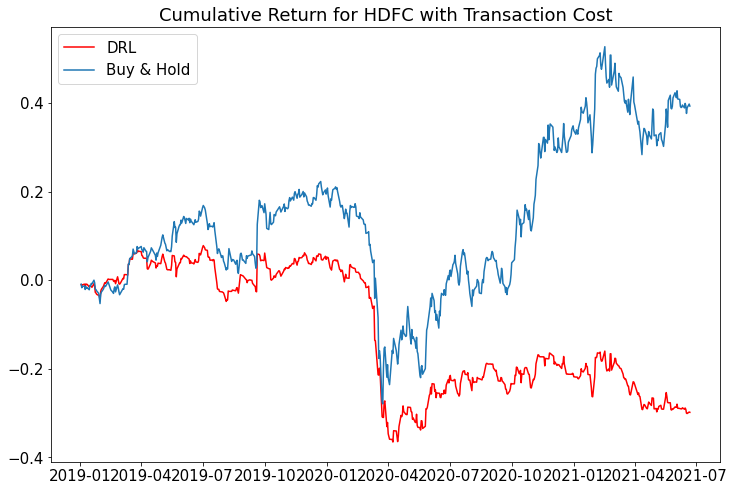

In [93]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(test.datadate, DRL_cumulative_return, color='red',label = "DRL")
plt.plot(test.datadate, buy_and_hold_cumulative_return, label = "Buy & Hold")
plt.title("Cumulative Return for HDFC with Transaction Cost",size= 18)
plt.legend()
plt.rc('legend',fontsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)